## KNN and NAIVE BAYES CLASSIFICATION ALGORITHMS

In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd 
from sklearn import datasets, neighbors
import matplotlib.pyplot as plt
from ipywidgets import interactive


In [2]:
#loading datset from UCI
wine = datasets.load_wine()
wine
#separating as X and Y
X=wine.data
y=wine.target

##### TASK 1

In [3]:
#A)
print('Number of wine classes:',len(wine.target_names))
wine.target_names

Number of wine classes: 3


array(['class_0', 'class_1', 'class_2'], dtype='<U7')

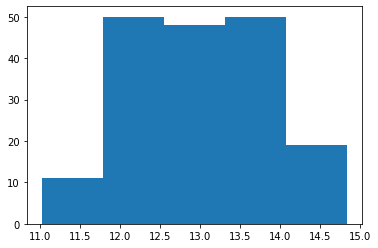

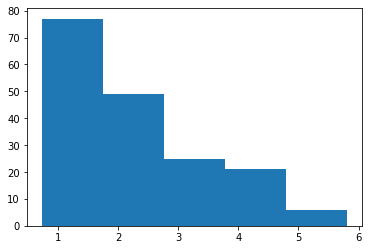

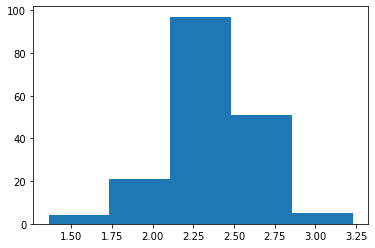

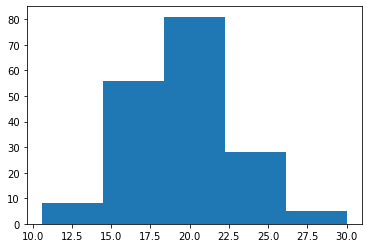

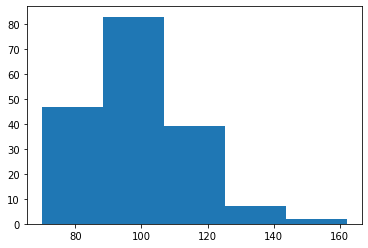

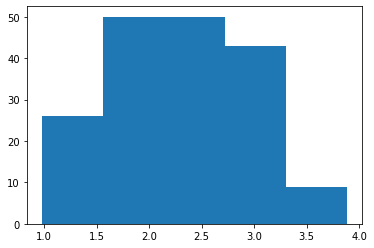

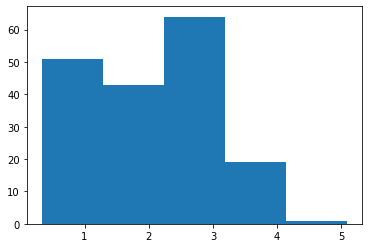

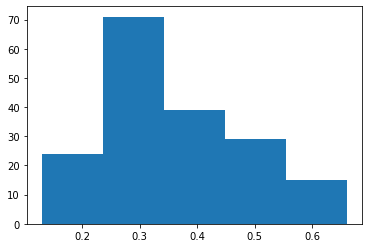

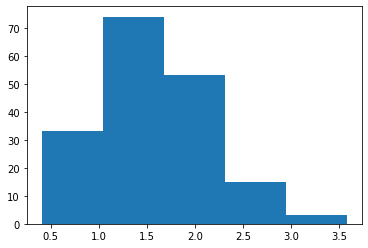

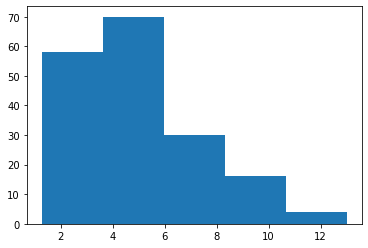

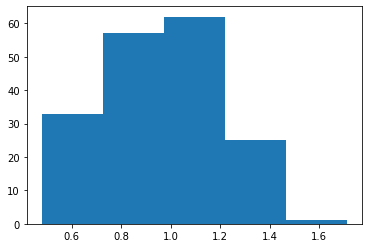

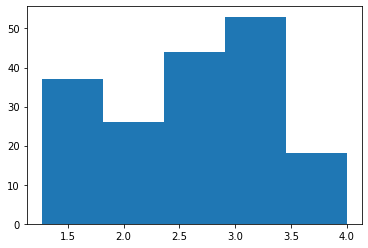

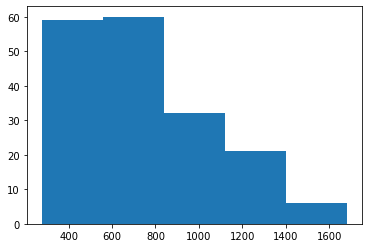

In [4]:
#B)Histogram for each input except output ALCOHOL 
for i in range(0,13):
    plt.hist(wine.data[:,i], bins=5)
    #plt.title(wine.feature_names[i])
    plt.show()

All the inputs are nearly normally distributed

In [5]:
#C)
wine1=pd.DataFrame(wine.data)
print('No.of instances:',wine1.shape[0])
print('No.of features:',wine1.shape[1])

No.of instances: 178
No.of features: 13


##### TASK 2

In [6]:
#Splitting data-training and testing with rs=42 & test size=20%

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [7]:
#Normalizing using STANDARD SCALAR

from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()            # define standard scaler
scaled1 = scaler1.fit_transform(wine1)  # transform data
print(scaled1)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


##### TASK 3

##### KNN CLASSIFICATION

In [8]:
def knn(k):
    
    # using the classifier
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X_train, y_train)
    ThePrediction = clf.predict(X_test)
    #ACCURACY(classifier performance)
    print ('Score of the test data k=',k,'is:',round(clf.score(X_test,y_test)*100,2),'%')
    
    print ('Predicted value for test_dependent k=',k,'is:',ThePrediction)
    ind=np.where(ThePrediction!=y_test)
    print('The wrong predictions are in the index of:',ind,'\n')

In [9]:
#For different K-values
for i in range(1,21):   
    knn(i)

Score of the test data k= 1 is: 77.78 %
Predicted value for test_dependent k= 1 is: [2 0 2 0 1 0 1 2 0 0 2 1 0 1 0 1 1 1 0 1 0 1 0 2 1 2 1 0 1 0 0 1 2 0 0 0]
The wrong predictions are in the index of: (array([ 0,  8,  9, 10, 11, 22, 24, 27], dtype=int64),) 

Score of the test data k= 2 is: 72.22 %
Predicted value for test_dependent k= 2 is: [2 0 1 0 1 0 1 1 0 0 2 1 0 1 0 1 1 1 0 1 0 1 0 2 1 2 1 0 1 0 0 1 2 0 0 0]
The wrong predictions are in the index of: (array([ 0,  2,  7,  8,  9, 10, 11, 22, 24, 27], dtype=int64),) 

Score of the test data k= 3 is: 80.56 %
Predicted value for test_dependent k= 3 is: [2 0 2 0 1 0 1 2 0 0 2 2 0 1 0 1 1 1 0 1 0 1 2 2 1 2 1 2 1 0 0 1 2 0 0 0]
The wrong predictions are in the index of: (array([ 0,  8,  9, 10, 22, 24, 27], dtype=int64),) 

Score of the test data k= 4 is: 75.0 %
Predicted value for test_dependent k= 4 is: [2 0 2 0 1 0 1 2 2 0 2 2 0 1 0 1 1 1 0 1 0 1 2 1 1 1 1 2 1 0 0 1 2 0 0 0]
The wrong predictions are in the index of: (array([ 0,  8,  9,

In [10]:
print('Good K for test data --> k = 3 with Score = 80.56%\n')
print('Predicted values are:\n[2 0 2 0 1 0 1 2 0 0 2 2 0 1 0 1 1 1 0 1 0 1 2 2 1 2 1 2 1 0 0 1 2 0 0 0]')
print('Actual values are:\n',y_test)
print('The wrong predictions are in the index of :\n[ 0,  8,  9, 10, 22, 24, 27]')

Good K for test data --> k = 3 with Score = 80.56%

Predicted values are:
[2 0 2 0 1 0 1 2 0 0 2 2 0 1 0 1 1 1 0 1 0 1 2 2 1 2 1 2 1 0 0 1 2 0 0 0]
Actual values are:
 [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
The wrong predictions are in the index of :
[ 0,  8,  9, 10, 22, 24, 27]


##### TASK 4

##### NAIVE BAYES REGRESSION

In [11]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [12]:
gnb.predict(X_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [13]:
y_test

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [14]:
print ('Score of the test data is:',round(gnb.score(X_test,y_test)*100,2),'%')

Score of the test data is: 100.0 %


In [15]:
df=pd.read_excel('wine1.xlsx')
df1=pd.DataFrame(df)
df1.columns=['Class','alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline']
df1

,Class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Probability of prediction

##### METHOD 1

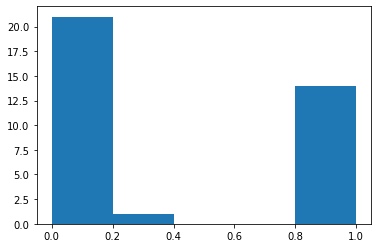

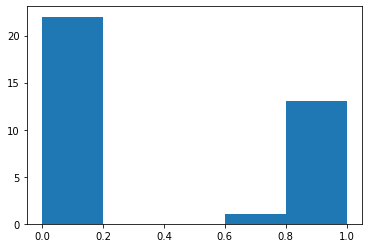

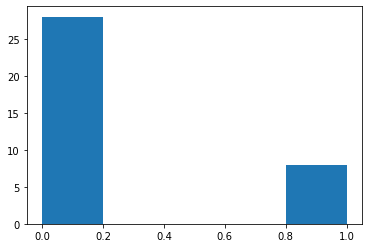

In [16]:
a=gnb.predict_proba(X_test)
#a.shape
plt.hist(a[:,0], bins=5)
plt.show()
plt.hist(a[:,1], bins=5)
plt.show()
plt.hist(a[:,2], bins=5)
plt.show()

                                                   OR

##### METHOD 2

In [17]:
# for each input column: get the number of counts, the user plays
features=['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline']
for feature in features:
    print(df.groupby(['Class'])[feature].value_counts())

Class  alcohol
1      13.05      4
       13.24      2
       13.56      2
       13.83      2
       14.06      2
                 ..
3      13.84      1
       13.88      1
       14.13      1
       14.16      1
       14.34      1
Name: alcohol, Length: 144, dtype: int64
Class  malic_acid
1      1.73          5
       1.81          3
       1.50          2
       1.64          2
       1.65          2
                    ..
3      4.95          1
       5.04          1
       5.19          1
       5.51          1
       5.65          1
Name: malic_acid, Length: 153, dtype: int64
Class  ash 
1      2.36    3
       2.70    3
       2.10    2
       2.12    2
       2.14    2
              ..
3      2.69    1
       2.72    1
       2.74    1
       2.75    1
       2.86    1
Name: ash, Length: 123, dtype: int64
Class  alcalinity_of_ash
1      16.0                 6
       16.8                 3
       17.2                 3
       20.0                 3
       14.0                 

In [18]:
# get the conditional probabilities by dividing over all entries
for feature in features:
    print(df.groupby(['Class'])[feature].value_counts() / df.groupby(['Class'])[feature].count())

Class  alcohol
1      13.05      0.067797
       13.24      0.033898
       13.56      0.033898
       13.83      0.033898
       14.06      0.033898
                    ...   
3      13.84      0.020833
       13.88      0.020833
       14.13      0.020833
       14.16      0.020833
       14.34      0.020833
Name: alcohol, Length: 144, dtype: float64
Class  malic_acid
1      1.73          0.084746
       1.81          0.050847
       1.50          0.033898
       1.64          0.033898
       1.65          0.033898
                       ...   
3      4.95          0.020833
       5.04          0.020833
       5.19          0.020833
       5.51          0.020833
       5.65          0.020833
Name: malic_acid, Length: 153, dtype: float64
Class  ash 
1      2.36    0.050847
       2.70    0.050847
       2.10    0.033898
       2.12    0.033898
       2.14    0.033898
                 ...   
3      2.69    0.020833
       2.72    0.020833
       2.74    0.020833
       2.75    0.020833

In [19]:
# the marginal probabilities of 'play'
df['Class'].value_counts()/ df['Class'].count()

2    0.398876
1    0.331461
3    0.269663
Name: Class, dtype: float64

In [20]:
df1=df[df.Class==1]
df2=df[df.Class==2]
df3=df[df.Class==3]

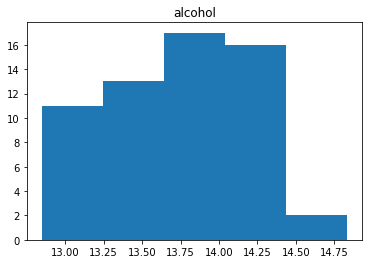

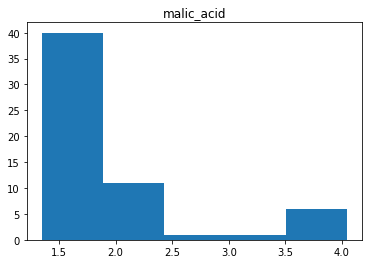

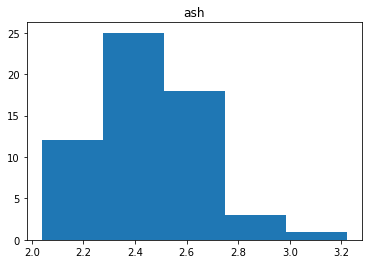

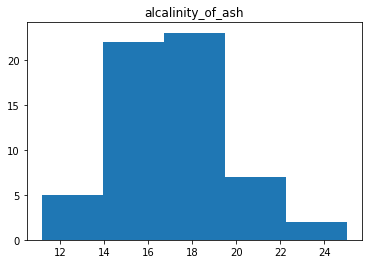

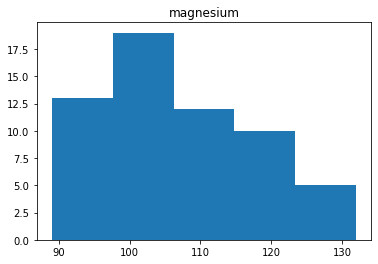

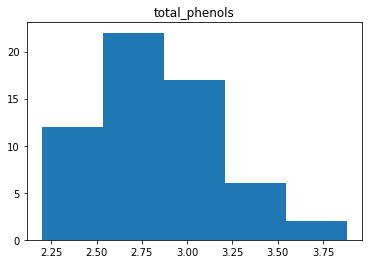

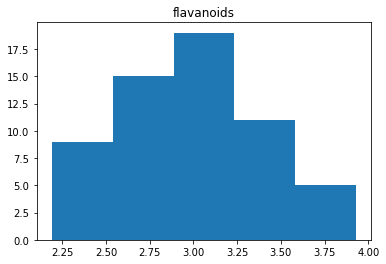

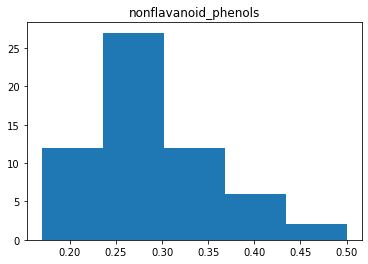

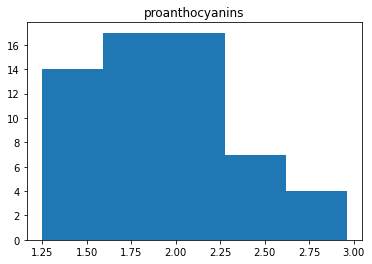

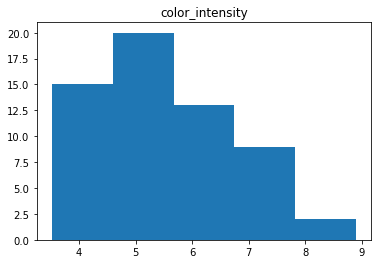

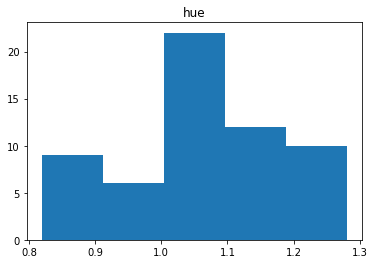

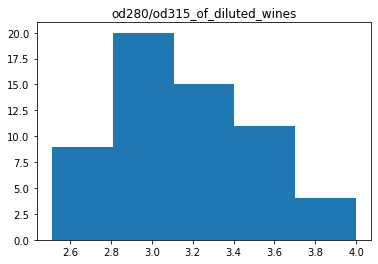

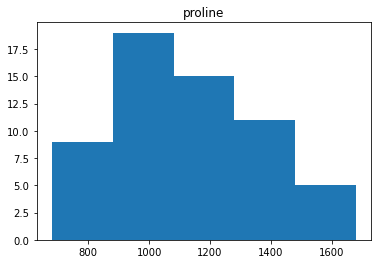

In [21]:
#Histogram -CLASS 1
for i in features:
    plt.hist(df1[i], bins=5)
    plt.title(i)
    plt.show()

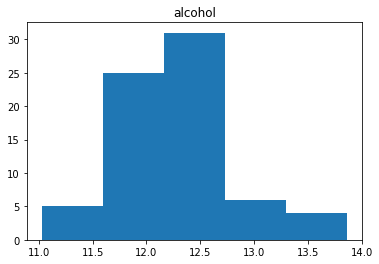

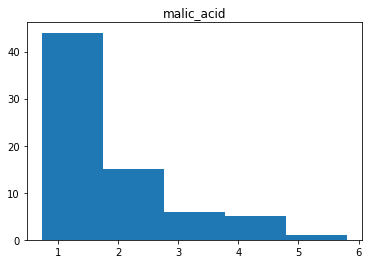

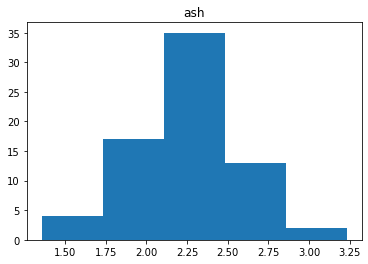

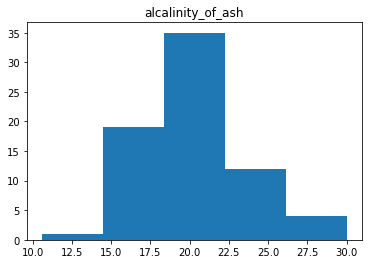

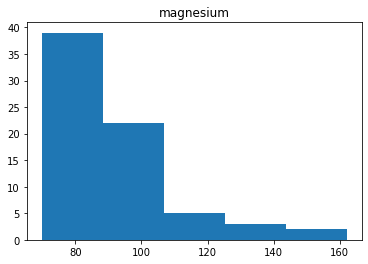

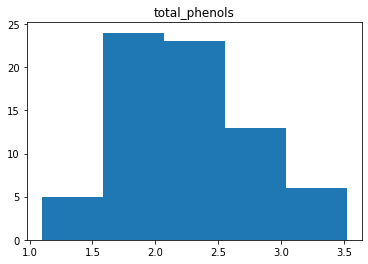

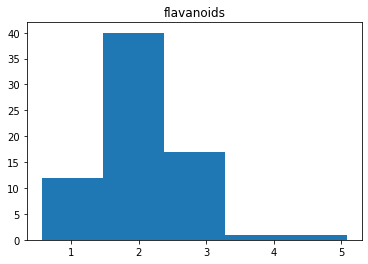

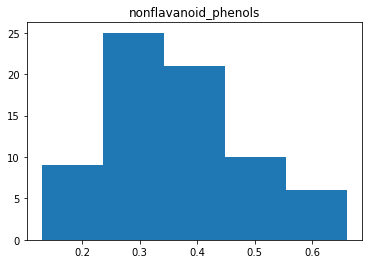

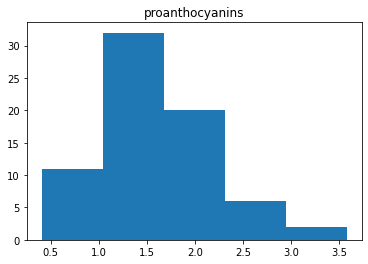

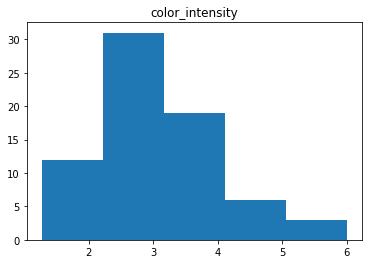

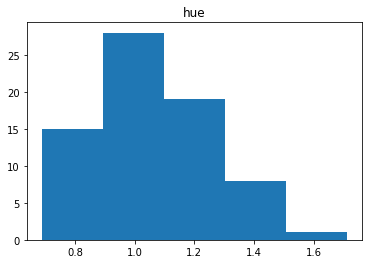

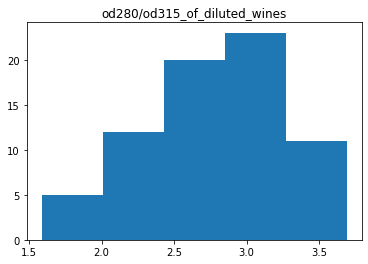

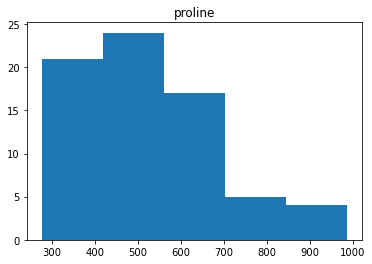

In [22]:
#Histogram -CLASS 2
for i in features:
    plt.hist(df2[i], bins=5)
    plt.title(i)
    plt.show()

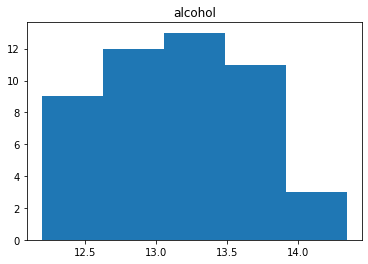

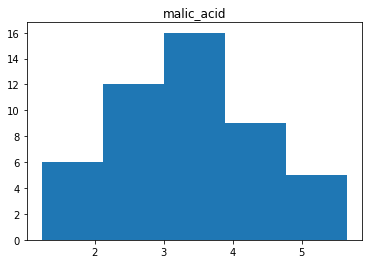

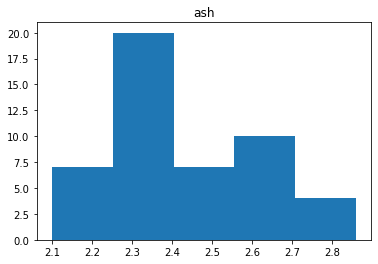

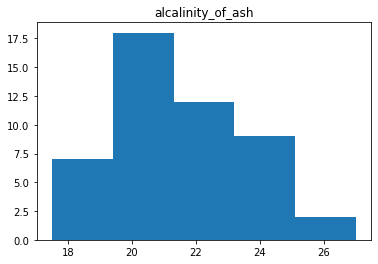

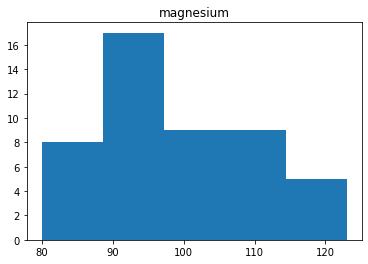

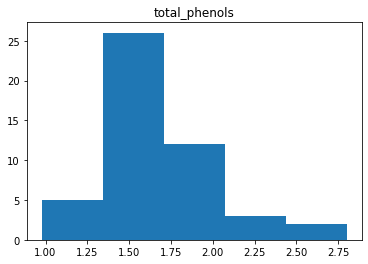

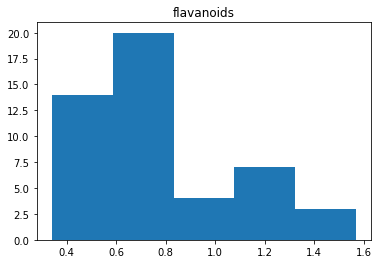

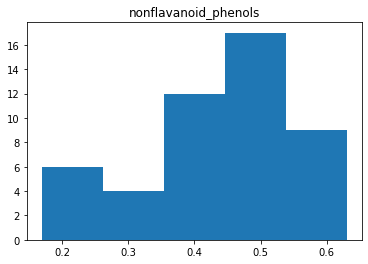

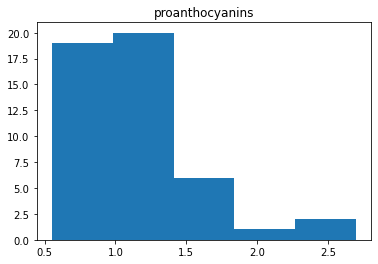

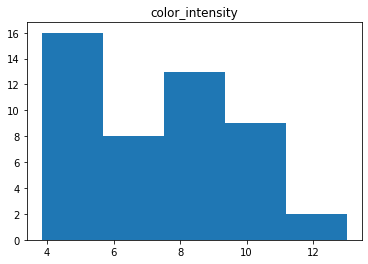

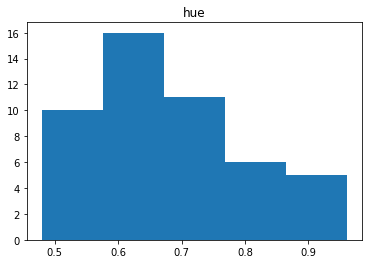

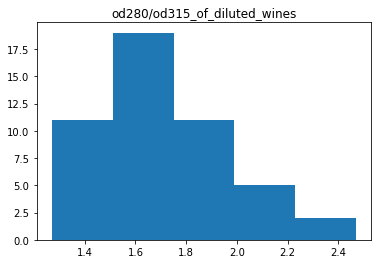

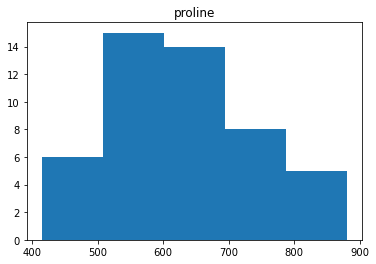

In [23]:
#Histogram -CLASS 3
for i in features:
    plt.hist(df3[i], bins=5)
    plt.title(i)
    plt.show()

In [24]:
#END